<a href="https://colab.research.google.com/github/anjuli0802/My-Repo/blob/main/titanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Dependecies


In [88]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#importing further required dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection

In [90]:
#load the dataset from csv file to pandas dataframe
titanic_data = pd.read_csv("/content/tested[1].csv")

# Data Preprocessing

In [91]:
#displayig the first 5 rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dataset info -> The 'Survived' column has 2 values: 0 -> 'Not Survived', 1 -> 'Survived'

In [92]:
#displaying the number of rows and columns present in our dataset
titanic_data.shape

(418, 12)

In [93]:
#displaying the information regarding the dtype,null valuees and count of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [94]:
#displaying the last or end 5 rows of the dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Evaluation of Missing Values


In [95]:
#checking for missing values in each column
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handling The Missing Values

In [96]:
#since most of the values from the 'cabin' column are missing, hence drop the column 'cabin'
titanic_data.drop(['Cabin'], axis = 1, inplace = True)

In [97]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [98]:
titanic_data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [99]:
titanic_data['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [100]:
#replacing the 'Age' column with the mean of the same column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [101]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [102]:
#replacing the missing value of 'Fare' column with it's mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace = True)

In [103]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [104]:
#getting the statistical measures of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [105]:
#finding the number of 'Survived' individuals
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Data Visualization

In [106]:
sns.set()

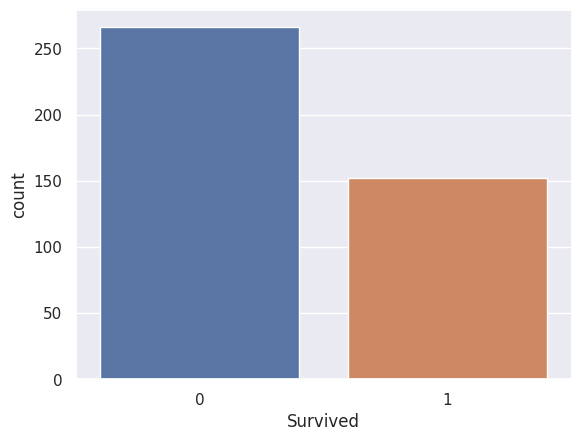

In [107]:
#making a count plot for the "survived" column
sns.countplot(x = 'Survived', data = titanic_data);

Plot Summary -> Number of "Survivors" was less than that of the "Non-Survivors".

In [108]:
#ratio of men vs women
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

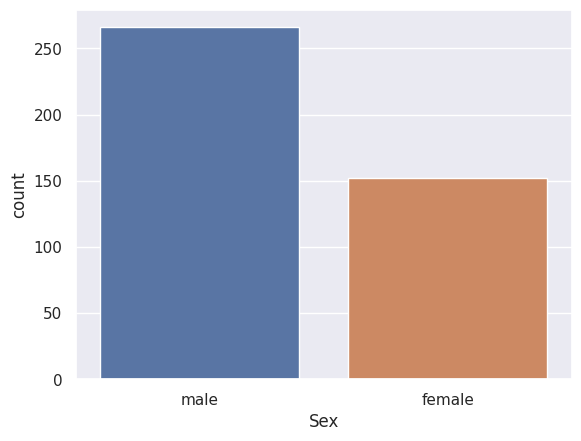

In [109]:
#countplot for the 'Sex' ratio
sns.countplot(x = 'Sex', data = titanic_data);

Plot Summary -> The number of "Male" passengers was greater than that of the "Female" passengers.

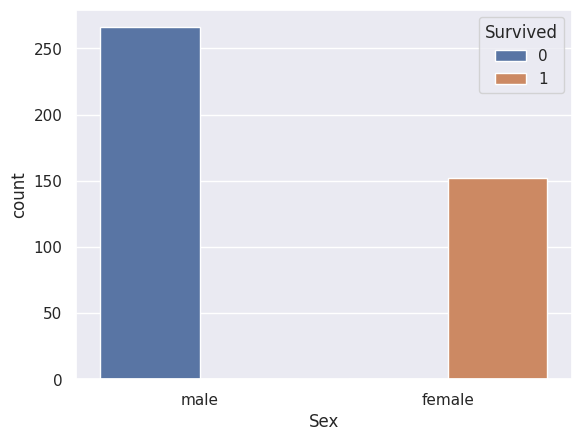

In [110]:
#plotting a graph based on the sex of the passengers
sns.countplot( x ='Sex', hue = 'Survived', data = titanic_data);

Plot Summary -> Only "Female" passengers were the casualties of the titanic tragedy.

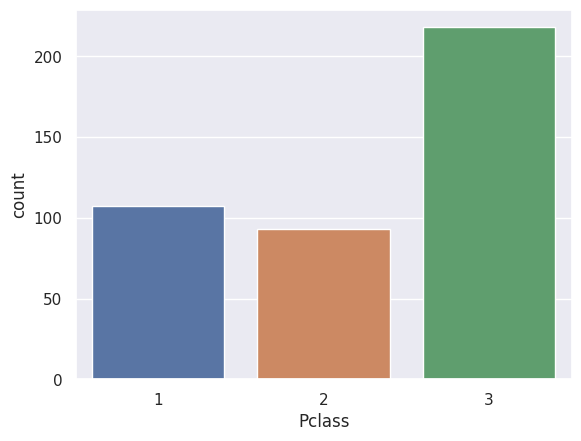

In [111]:
#count plot for the PClass column
sns.countplot(x = 'Pclass', data = titanic_data);

Plot Summary -> There were more passengers from the "Third Class".

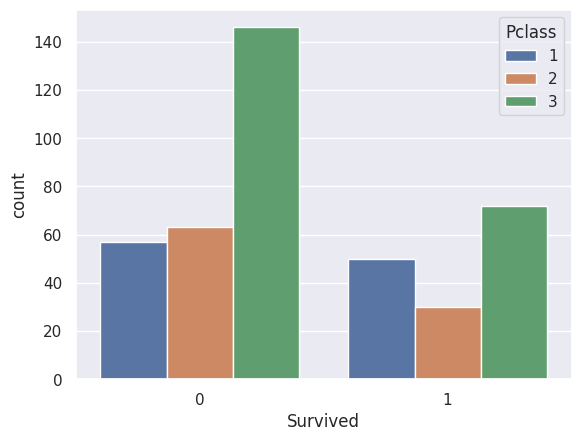

In [112]:
#plot based on the survivors vs the Pclass
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic_data);

Plot Summary -> There was a higher casualty rate of the "Pclass = 3" i.e the "Third Class" passengers.

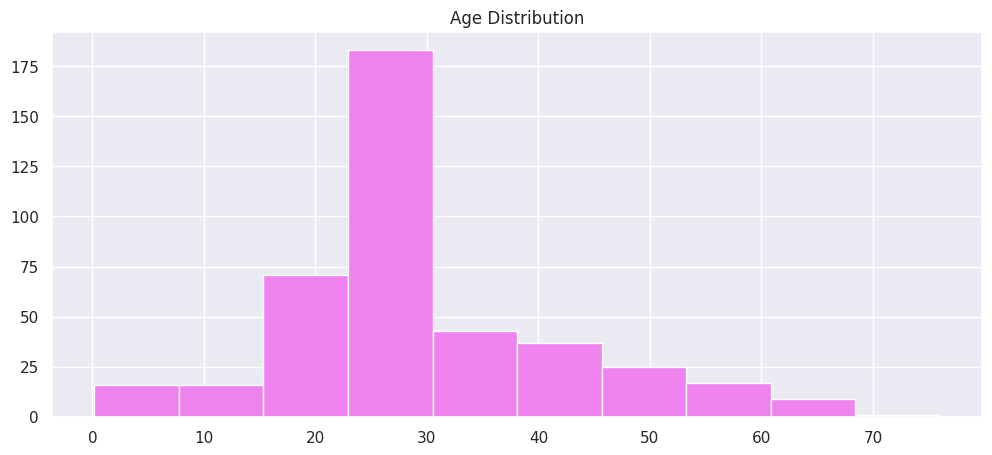

In [113]:
#histogram for age
fig, ax = plt.subplots(figsize = (12,5))
ax.hist(x = 'Age', data = titanic_data, color = 'violet');
ax.set(title = 'Age Distribution');

Plot Summary -> There were more number of passengers in the age range of '25-30'.

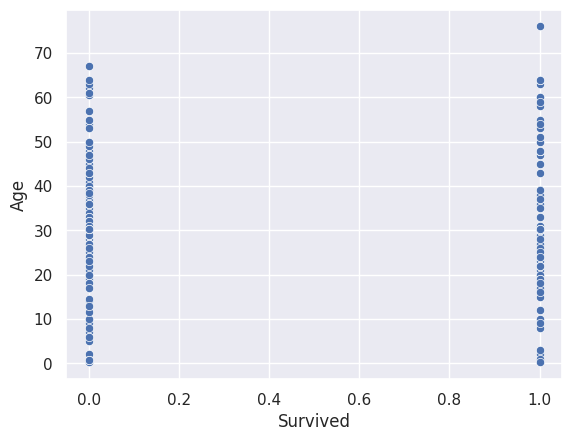

In [114]:
#plot for age vs survived
sns.scatterplot(x = 'Survived', y = 'Age', data = titanic_data);

Plot Summary -> There was almost an equal ratio for "Survived" as well as "Non-Survived" passengers n terms of "Age".

# Encoding the Categorical Columns

In [115]:
#checking for categorical values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [116]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [117]:
#converting the categorical values "Male" and "Female" into numeric values of 0 and 1
titanic_data['Sex'].replace(to_replace = 'male', value = 0, inplace = True)
titanic_data['Sex'].replace(to_replace = 'female', value = 1, inplace = True)

In [118]:
#checking for the update
titanic_data['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [119]:
#displaying the update for the conversion of the "Sex" column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [120]:
titanic_data['Age'].unique

<bound method Series.unique of 0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64>

In [121]:
#converting the dtype of "Age" column from float to int
titanic_data['Age'] = titanic_data['Age'].astype(int)

In [122]:
#displaying the update in the dtype of "Age" column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    int64  
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


In [123]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [124]:
titanic_data.replace({'Embarked' : { 'S' : 0, 'C' : 1, 'Q' : 2}},inplace = True)

In [125]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    int64  
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 36.0+ KB


# Separating Features and Targets

In [126]:
x = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
y = titanic_data['Survived']

In [127]:
#displaying x
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,2
1,3,1,47,1,0,7.0000,0
2,2,0,62,0,0,9.6875,2
3,3,0,27,0,0,8.6625,0
4,3,1,22,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30,0,0,8.0500,0
414,1,1,39,0,0,108.9000,1
415,3,0,38,0,0,7.2500,0
416,3,0,30,0,0,8.0500,0


In [128]:
#displaying y
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Splitting the data into training & testing data

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 42)

# Model Training

In [130]:
#applying logistic regression
model = LogisticRegression()

In [131]:
#training and fitting the train and test data to the logistic regression model
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

## Accuracy Score

In [132]:
#evaluating the accuracy score
x_pred = model.predict(x_train)

In [133]:
x_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [134]:
#displaying the accuracy score
training_data_accuracy = accuracy_score(y_train, x_pred)
print("Accuracy score of training data is: ", training_data_accuracy)

Accuracy score of training data is:  1.0


In [135]:
#accuracy on test data
x_test_pred = model.predict(x_test)

In [136]:
x_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [137]:
#printing the accuracy score
test_data_accuracy = accuracy_score(y_test, x_test_pred)
print("Accuracy score of test data is: ", test_data_accuracy)

Accuracy score of test data is:  1.0


In [138]:
#importing dependencies
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import recall_score

In [139]:
#printing the precision score
precision_test = precision_score(y_test, x_test_pred)
print("The precision_score of testing data is: ", precision_test)

The precision_score of testing data is:  1.0


In [140]:
#printing the f1_score
f1_score_test = f1_score(y_test, x_test_pred)
print("The f1_score of testing data is: ", f1_score_test)

The f1_score of testing data is:  1.0


In [141]:
#printing the recall_score
recall_score_test = recall_score(y_test, x_test_pred)
print("The recall_score of testing data is: ", recall_score_test)

The recall_score of testing data is:  1.0
